![Cabec%CC%A7alho_notebook.png](cabecalho_notebook.png)

# Classificação de Atividade Humana com PCA

Vamos trabalhar com a base da demonstração feita em aula, mas vamos explorar um pouco melhor como é o desempenho da árvore variando o número de componentes principais.

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score


filename_features = "./Dados/features.txt"
filename_labels = "./Dados/activity_labels.txt"

filename_subtrain = "./Dados/train/subject_train.txt"
filename_xtrain = "./Dados/train/X_train.txt"
filename_ytrain = "./Dados/train/y_train.txt"

filename_subtest = "./Dados/test/subject_test.txt"
ffilename_xtest = "./Dados/test/X_test.txt"
filename_ytest = "./Dados/test/y_test.txt"

features = pd.read_csv(filename_features, header=None, names=['nome_var'],sep="#").squeeze()
labels = pd.read_csv(filename_labels, delim_whitespace=True, header=None, names=['cod_label', 'label'])

subject_train = pd.read_csv(filename_subtrain, header=None, names=['subject_id']).squeeze
X_train = pd.read_csv(filename_xtrain, delim_whitespace=True, header=None, names=features.tolist())
y_train = pd.read_csv(filename_ytrain, header=None, names=['cod_label'])

subject_test = pd.read_csv(filename_subtest, header=None, names=['subject_id']).squeeze()
X_test = pd.read_csv(ffilename_xtest, delim_whitespace=True, header=None, names=features.tolist())
y_test = pd.read_csv(filename_ytest, header=None, names=['cod_label'])

C:\Users\marce\AppData\Local\Temp\ipykernel_2600\3043580762.py:23: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  labels = pd.read_csv(filename_labels, delim_whitespace=True, header=None, names=['cod_label', 'label'])
C:\Users\marce\AppData\Local\Temp\ipykernel_2600\3043580762.py:26: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  X_train = pd.read_csv(filename_xtrain, delim_whitespace=True, header=None, names=features.tolist())
C:\Users\marce\AppData\Local\Temp\ipykernel_2600\3043580762.py:30: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  X_test = pd.read_csv(ffilename_xtest, delim_whitespace=True, header=None, names=features.tolist())


## PCA com variáveis padronizadas

Reflexão sobre a escala das variáveis:

**Variáveis em métricas muito diferentes** podem interferir na análise de componentes principais. Lembra que variância é informação pra nós? Pois bem, tipicamente se há uma variável monetária como salário, vai ter uma ordem de variabilidade bem maior que número de filhos, tempo de emprego ou qualquer variável dummy. Assim, as variáveis de maior variância tendem a "dominar" a análise. Nesses casos é comum usar a padronização das variáveis.

Faça duas análises de componentes principais para a base do HAR - com e sem padronização e compare:

- A variância explicada por componente
- A variância explicada acumulada por componente
- A variância percentual por componente
- A variância percentual acumulada por componente
- Quantas componentes você escolheria, em cada caso para explicar 90% da variância?

In [15]:
# PCA sem padronização
pca_no_scaling = PCA()
principal_components = pca_no_scaling.fit_transform(X_train)

In [16]:
explained_variance_no_scaling = pca_no_scaling.explained_variance_
explained_variance_ratio_no_scaling = pca_no_scaling.explained_variance_ratio_
explained_variance_cumsum_no_scaling = explained_variance_ratio_no_scaling.cumsum()

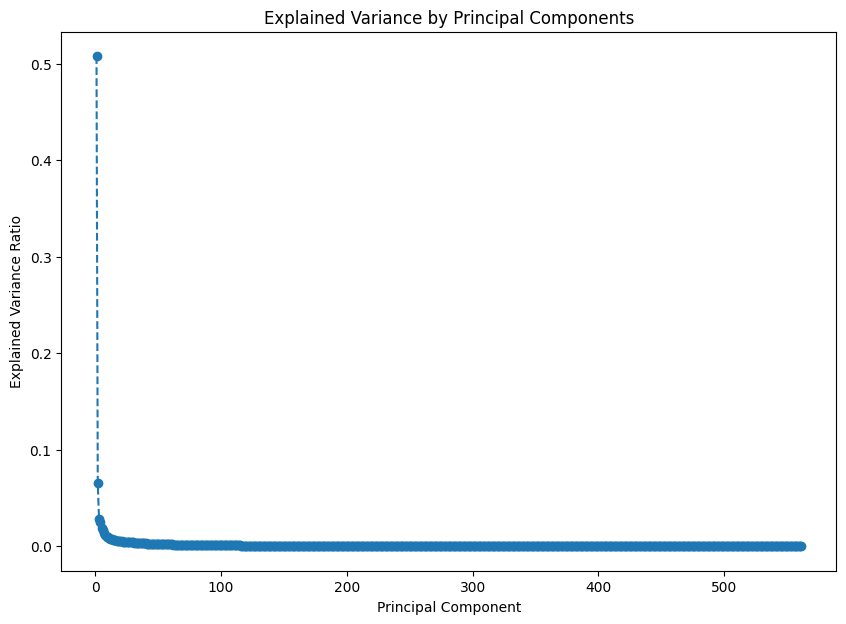

In [14]:
# Plotar a variância explicada
plt.figure(figsize=(10, 7))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.title('Explained Variance by Principal Components')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.show()

In [25]:
%%time

def padroniza(s):
    if s.std() > 0:
        s = (s - s.mean())/s.std()
    return s

X_train_pad = pd.DataFrame(X_train).apply(padroniza, axis=0)
X_test_pad = X_test.apply(padroniza, axis=0)

CPU times: total: 359 ms
Wall time: 476 ms


In [26]:
# PCA dados padronizados
pca_scaling = PCA()
principal_components = pca_scaling.fit_transform(X_train_pad)

In [27]:
explained_variance_scaling = pca_scaling.explained_variance_
explained_variance_ratio_scaling = pca_scaling.explained_variance_ratio_
explained_variance_cumsum_scaling = explained_variance_ratio_scaling.cumsum()

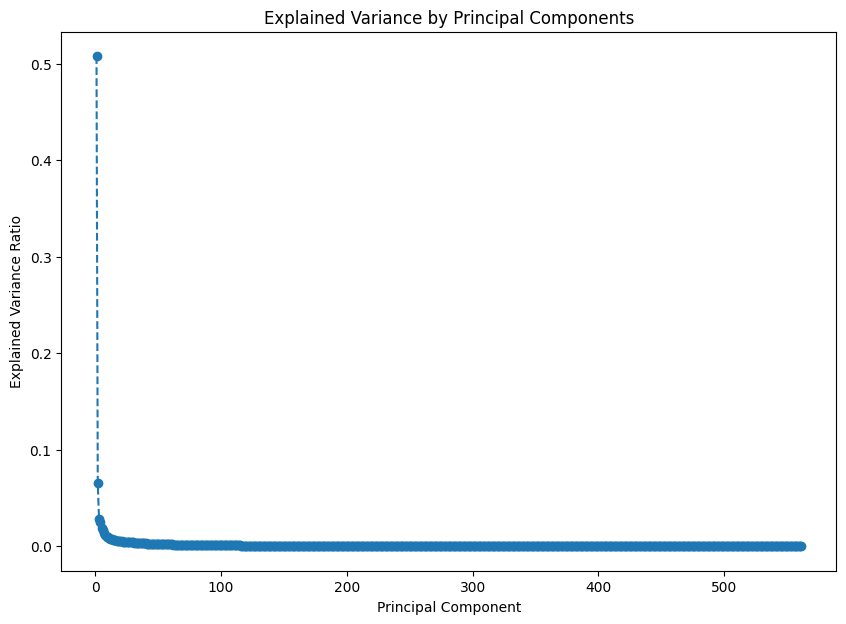

In [28]:
# Obter a quantidade de variância explicada por cada componente principal
explained_variance = pca_scaling.explained_variance_ratio_

# Plotar a variância explicada
plt.figure(figsize=(10, 7))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.title('Explained Variance by Principal Components')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.show()

Plotar e comparar os resultados

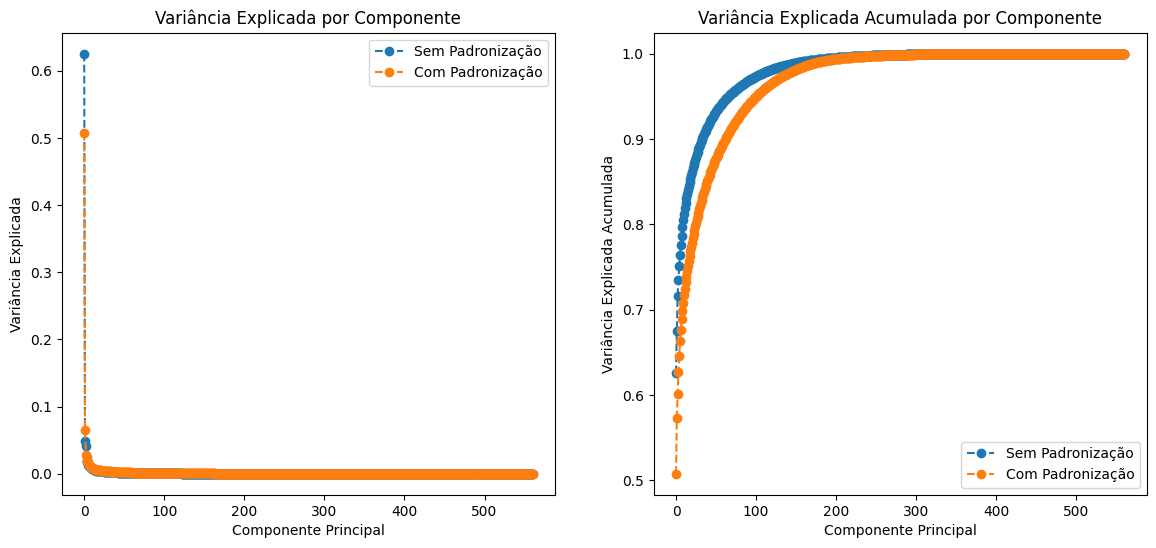

Sem Padronização:
Variância Explicada por Componente: [6.25544400e-01 4.91302272e-02 4.12146745e-02 1.87495612e-02
 1.69485999e-02 1.27206929e-02 1.17668514e-02 1.06897316e-02
 9.69379779e-03 8.58018171e-03 7.62301911e-03 6.72445661e-03
 5.79419596e-03 5.57880638e-03 4.98925730e-03 4.74937626e-03
 4.67200109e-03 4.31617860e-03 4.25715180e-03 4.10395039e-03
 3.94002401e-03 3.75309316e-03 3.52427488e-03 3.39359425e-03
 3.32138998e-03 3.19428786e-03 3.01779149e-03 2.91782575e-03
 2.89569956e-03 2.81927795e-03 2.76704148e-03 2.63395052e-03
 2.55306687e-03 2.35865883e-03 2.30652304e-03 2.23648168e-03
 2.22948133e-03 2.10275984e-03 2.08392917e-03 2.04773752e-03
 1.92856457e-03 1.88879623e-03 1.81180259e-03 1.79472696e-03
 1.72327672e-03 1.60201939e-03 1.57039496e-03 1.56627367e-03
 1.52969849e-03 1.50351278e-03 1.45117716e-03 1.40640152e-03
 1.36825069e-03 1.26857902e-03 1.25006115e-03 1.19742181e-03
 1.18119807e-03 1.14994893e-03 1.13082490e-03 1.09669551e-03
 1.07704072e-03 1.04900274e-03 

In [29]:
# Plotar a variância explicada por componente
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(explained_variance_ratio_no_scaling, marker='o', linestyle='--', label='Sem Padronização')
plt.plot(explained_variance_ratio_scaling, marker='o', linestyle='--', label='Com Padronização')
plt.title('Variância Explicada por Componente')
plt.xlabel('Componente Principal')
plt.ylabel('Variância Explicada')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(explained_variance_cumsum_no_scaling, marker='o', linestyle='--', label='Sem Padronização')
plt.plot(explained_variance_cumsum_scaling, marker='o', linestyle='--', label='Com Padronização')
plt.title('Variância Explicada Acumulada por Componente')
plt.xlabel('Componente Principal')
plt.ylabel('Variância Explicada Acumulada')
plt.legend()

plt.show()

# Exibir a variância percentual e acumulada
print("Sem Padronização:")
print(f"Variância Explicada por Componente: {explained_variance_ratio_no_scaling}")
print(f"Variância Explicada Acumulada: {explained_variance_cumsum_no_scaling}")

print("\nCom Padronização:")
print(f"Variância Explicada por Componente: {explained_variance_ratio_scaling}")
print(f"Variância Explicada Acumulada: {explained_variance_cumsum_scaling}")

# Determinar o número de componentes para explicar 90% da variância
num_components_no_scaling = next(i for i, total in enumerate(explained_variance_cumsum_no_scaling) if total >= 0.90) + 1
num_components_scaling = next(i for i, total in enumerate(explained_variance_cumsum_scaling) if total >= 0.90) + 1

print(f"\nNúmero de Componentes para Explicar 90% da Variância (Sem Padronização): {num_components_no_scaling}")
print(f"Número de Componentes para Explicar 90% da Variância (Com Padronização): {num_components_scaling}")


Conclusão

Sem padronização, a variância é dominada pela primeira componente principal, enquanto com padronização, a variância é mais distribuída entre várias componentes principais.

## Árvore com PCA

Faça duas uma árvore de decisão com 10 componentes principais - uma com base em dados padronizados e outra sem padronizar. Utilize o ```ccp_alpha=0.001```.

Compare a acurácia na base de treino e teste.

In [31]:
%%time
# Definir número de componentes principais 
n_components = 10

pca_no_scaling = PCA(n_components=n_components)
X_train_pca_no_scaling = pca_no_scaling.fit_transform(X_train)
X_test_pca_no_scaling = pca_no_scaling.transform(X_test)

pca_scaling = PCA(n_components=n_components)
X_train_pca_scaling = pca_scaling.fit_transform(X_train_pad)
X_test_pca_scaling = pca_scaling.transform(X_test_pad)

clf_no_scaling = DecisionTreeClassifier(ccp_alpha=0.001, random_state=42)
clf_no_scaling.fit(X_train_pca_no_scaling, y_train)
clf_scaling = DecisionTreeClassifier(ccp_alpha=0.001, random_state=42)
clf_scaling.fit(X_train_pca_scaling, y_train)

y_train_pred_no_scaling = clf_no_scaling.predict(X_train_pca_no_scaling)
y_test_pred_no_scaling = clf_no_scaling.predict(X_test_pca_no_scaling)

y_train_pred_scaling = clf_scaling.predict(X_train_pca_scaling)
y_test_pred_scaling = clf_scaling.predict(X_test_pca_scaling)

accuracy_train_no_scaling = accuracy_score(y_train, y_train_pred_no_scaling)
accuracy_test_no_scaling = accuracy_score(y_test, y_test_pred_no_scaling)

accuracy_train_scaling = accuracy_score(y_train, y_train_pred_scaling)
accuracy_test_scaling = accuracy_score(y_test, y_test_pred_scaling)

print("Acurácia de Treino (No Scaling):", accuracy_train_no_scaling)
print("Acurácia de Teste (No Scaling):", accuracy_test_no_scaling)
print("Acurácia de treino (Scaling):", accuracy_train_scaling)
print("Acurácia de teste (Scaling):", accuracy_test_scaling)

Acurácia de Treino (No Scaling): 0.8922742110990207
Acurácia de Teste (No Scaling): 0.8167628096369189
Acurácia de treino (Scaling): 0.8593579978237215
Acurácia de teste (Scaling): 0.7723108245673567
CPU times: total: 750 ms
Wall time: 611 ms
